## National Health and Nutrition Examination Survey
- 2005-2006 Data Documentation, Codebook, and Frequencies

- Cholesterol - Total (TCHOL_D)

- Data File: TCHOL_D.xpt
-https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/TCHOL_D.htm#SEQN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# open
tc= pd.read_sas('resources/TCHOL_D.XPT')
tc.head()

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [4]:
# length of the df
len(tc)

8086

In [5]:
# cols in the df
tc.columns

Index(['SEQN', 'LBXTC', 'LBDTCSI'], dtype='object')

In [6]:
# rename
tc = tc.rename(columns={
       'SEQN':'Respondent sequence number',
       'LBXTC':'Total cholesterol (mg/dL)'
})
tc.head()

,Respondent sequence number,Total cholesterol (mg/dL),LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [7]:
# drop the col.
tc1 = tc.drop(['LBDTCSI'], axis=1)
tc1.head()

,Respondent sequence number,Total cholesterol (mg/dL)
0,31128.0,129.0
1,31129.0,170.0
2,31130.0,NaN
3,31131.0,105.0
4,31132.0,147.0


In [8]:
# value_counts() the total cholesterol
count_tc = tc1['Total cholesterol (mg/dL)'].value_counts()
count_tc

163.0    94
162.0    88
168.0    86
174.0    84
166.0    83
         ..
90.0      1
366.0     1
337.0     1
309.0     1
78.0      1
Name: Total cholesterol (mg/dL), Length: 266, dtype: int64

In [9]:
# summary stat
tc1['Total cholesterol (mg/dL)'].describe()

count    7360.000000
mean      184.471060
std        42.844203
min        78.000000
25%       155.000000
50%       179.000000
75%       209.000000
max       615.000000
Name: Total cholesterol (mg/dL), dtype: float64

<AxesSubplot:xlabel='Total cholesterol (mg/dL)', ylabel='Count'>

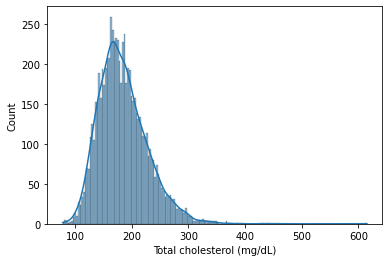

In [10]:
# histogram
sns.histplot(tc1['Total cholesterol (mg/dL)'],
             bins=100, element='bars', binwidth=3, kde=True)

---
## National Health and Nutrition Examination Survey
- 2005-2006 Data Documentation, Codebook, and Frequencies

- Cholesterol - HDL (HDL_D)

- Data File: HDL_D.xpt
- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HDL_D.htm

In [11]:
# open
hdl = pd.read_sas('resources/HDL_D.XPT')
hdl.head()

,SEQN,LBDHDD,LBDHDDSI
0,31128.0,55.0,1.42
1,31129.0,46.0,1.19
2,31130.0,NaN,NaN
3,31131.0,39.0,1.01
4,31132.0,59.0,1.53


In [12]:
# length of df
len(hdl)

8086

In [13]:
# rename cols.
hdl = hdl.rename(columns={
       'SEQN':'Respondent sequence number',
       'LBDHDD':'Direct HDL-Cholesterol (mg/dL)'
})
hdl.head()

,Respondent sequence number,Direct HDL-Cholesterol (mg/dL),LBDHDDSI
0,31128.0,55.0,1.42
1,31129.0,46.0,1.19
2,31130.0,NaN,NaN
3,31131.0,39.0,1.01
4,31132.0,59.0,1.53


In [14]:
# drop a col
hdl1 = hdl.drop(['LBDHDDSI'], axis=1)
hdl1.head()

,Respondent sequence number,Direct HDL-Cholesterol (mg/dL)
0,31128.0,55.0
1,31129.0,46.0
2,31130.0,NaN
3,31131.0,39.0
4,31132.0,59.0


In [15]:
# summary stat
hdl1['Direct HDL-Cholesterol (mg/dL)'].describe()

count    7360.000000
mean       54.781929
std        15.476290
min        15.000000
25%        43.000000
50%        52.000000
75%        63.000000
max       188.000000
Name: Direct HDL-Cholesterol (mg/dL), dtype: float64

<AxesSubplot:xlabel='Direct HDL-Cholesterol (mg/dL)', ylabel='Count'>

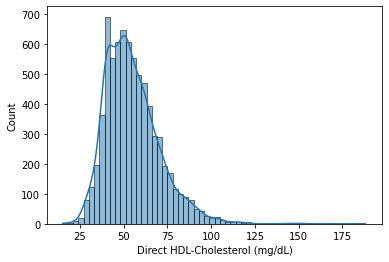

In [16]:
# histogram
sns.histplot(hdl1['Direct HDL-Cholesterol (mg/dL)'],
             bins=100, element='bars', binwidth=3, kde=True)

---
### merge totol cholesterol with hdl

In [17]:
# merge
merge = tc1.merge(hdl1, on='Respondent sequence number')
merge.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL)
0,31128.0,129.0,55.0
1,31129.0,170.0,46.0
2,31130.0,NaN,NaN
3,31131.0,105.0,39.0
4,31132.0,147.0,59.0


In [18]:
# length of the df
len(merge)

8086

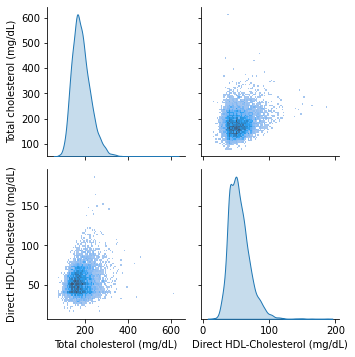

In [19]:
sns.pairplot(merge[['Total cholesterol (mg/dL)', 'Direct HDL-Cholesterol (mg/dL)']],
             diag_kind='kde', kind='hist')

- no correlation bet. total cholesterol with hdl?

---
## National Health and Nutrition Examination Survey
- 2005-2006 Data Documentation, Codebook, and Frequencies

- Cholesterol - LDL, Triglyceride & Apoliprotein (ApoB) (TRIGLY_D)

- Data File: TRIGLY_D.xpt
- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/TRIGLY_D.htm

In [20]:
# open
ldl = pd.read_sas('resources/TRIGLY_D.XPT')
ldl.head()

,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBXAPB,LBDAPBSI
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,6.755681e+04,86.0,0.971,49.0,1.267,50.0,0.50
2,31132.0,8.019396e+04,65.0,0.734,75.0,1.940,75.0,0.75
3,31133.0,1.566802e+04,61.0,0.689,81.0,2.095,75.0,0.75
4,31134.0,9.339954e+04,195.0,2.202,98.0,2.534,111.0,1.11


In [21]:
# length of df
len(ldl)

3352

In [22]:
# rename
ldl = ldl.rename(columns={
       'SEQN': 'Respondent sequence number',
       'LBXTR': 'Triglyceride (mg/dL)',
       'LBDLDL': 'LDL-cholesterol (mg/dL)',  
       'LBXAPB': 'Apolipoprotein (B) (mg/dL)'
})
ldl.head()

,Respondent sequence number,WTSAF2YR,Triglyceride (mg/dL),LBDTRSI,LDL-cholesterol (mg/dL),LBDLDLSI,Apolipoprotein (B) (mg/dL),LBDAPBSI
0,31130.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,6.755681e+04,86.0,0.971,49.0,1.267,50.0,0.50
2,31132.0,8.019396e+04,65.0,0.734,75.0,1.940,75.0,0.75
3,31133.0,1.566802e+04,61.0,0.689,81.0,2.095,75.0,0.75
4,31134.0,9.339954e+04,195.0,2.202,98.0,2.534,111.0,1.11


In [23]:
# drop col
ldl1 = ldl.drop(ldl[['WTSAF2YR', 'LBDTRSI', 'LBDAPBSI', 'LBDLDLSI']], axis=1)
ldl1.head()

,Respondent sequence number,Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL)
0,31130.0,NaN,NaN,NaN
1,31131.0,86.0,49.0,50.0
2,31132.0,65.0,75.0,75.0
3,31133.0,61.0,81.0,75.0
4,31134.0,195.0,98.0,111.0


In [24]:
len(ldl1)

3352

In [25]:
# merge
merge1 = merge.merge(ldl1, on='Respondent sequence number')
merge1.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL),Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL)
0,31130.0,NaN,NaN,NaN,NaN,NaN
1,31131.0,105.0,39.0,86.0,49.0,50.0
2,31132.0,147.0,59.0,65.0,75.0,75.0
3,31133.0,147.0,54.0,61.0,81.0,75.0
4,31134.0,186.0,49.0,195.0,98.0,111.0


In [26]:
merge1.columns

Index(['Respondent sequence number', 'Total cholesterol (mg/dL)',
       'Direct HDL-Cholesterol (mg/dL)', 'Triglyceride (mg/dL)',
       'LDL-cholesterol (mg/dL)', 'Apolipoprotein (B) (mg/dL)'],
      dtype='object')

In [27]:
len(merge1)

3352

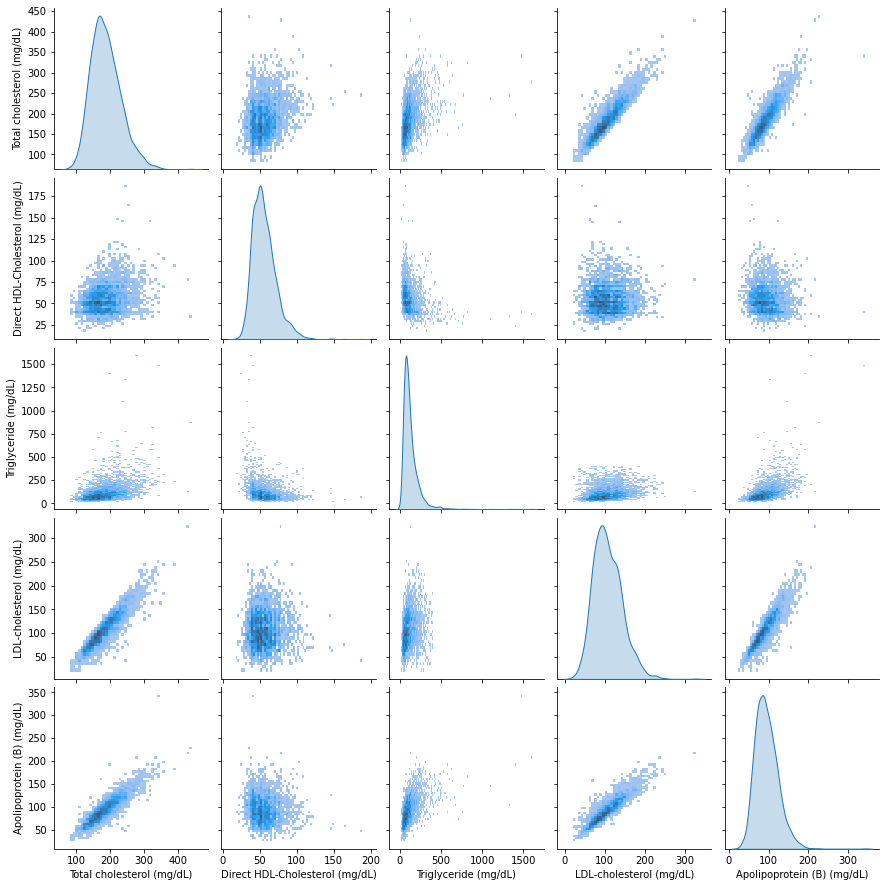

In [28]:
sns.pairplot(merge1[['Total cholesterol (mg/dL)',
       'Direct HDL-Cholesterol (mg/dL)', 'Triglyceride (mg/dL)',
       'LDL-cholesterol (mg/dL)', 'Apolipoprotein (B) (mg/dL)']],
       diag_kind='kde', kind='hist')

- total cholesterol is directly proportional to ldl-cholesterol, apolipoprotein
- ldl-cholesterol is directly proportional to apolipoprotein 

---
## National Health and Nutrition Examination Survey
- 2005-2006 Data Documentation, Codebook, and Frequencies

- Glycohemoglobin (GHB_D)

- Data File: GHB_D.xpt

- https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/GHB_D.htm

In [29]:
ghg = pd.read_sas('resources/GHB_D.XPT')
ghg.head()

,SEQN,LBXGH
0,31129.0,5.2
1,31130.0,NaN
2,31131.0,6.0
3,31132.0,7.1
4,31133.0,4.7


In [30]:
len(ghg)

6980

In [31]:
ghg = ghg.rename(columns={
    'SEQN':'Respondent sequence number',
    'LBXGH': 'Glycohemoglobin (%)'
})

ghg.head()

,Respondent sequence number,Glycohemoglobin (%)
0,31129.0,5.2
1,31130.0,NaN
2,31131.0,6.0
3,31132.0,7.1
4,31133.0,4.7


In [32]:
# summary stat
ghg['Glycohemoglobin (%)'].describe()

count    6493.000000
mean        5.423425
std         0.906870
min         3.800000
25%         5.000000
50%         5.300000
75%         5.600000
max        15.600000
Name: Glycohemoglobin (%), dtype: float64

<AxesSubplot:xlabel='Glycohemoglobin (%)', ylabel='Count'>

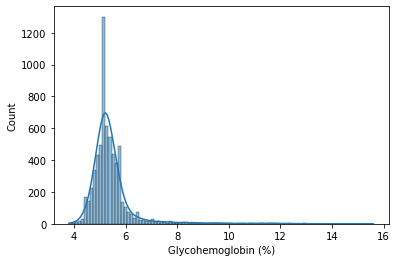

In [38]:
# histo
sns.histplot(ghg['Glycohemoglobin (%)'],
             bins=100, element='bars', kde=True)

---
### merge glocohemoglobin 

In [34]:
# merge
merge2 = merge1.merge(ghg, on='Respondent sequence number')
merge2.head()

,Respondent sequence number,Total cholesterol (mg/dL),Direct HDL-Cholesterol (mg/dL),Triglyceride (mg/dL),LDL-cholesterol (mg/dL),Apolipoprotein (B) (mg/dL),Glycohemoglobin (%)
0,31130.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31131.0,105.0,39.0,86.0,49.0,50.0,6.0
2,31132.0,147.0,59.0,65.0,75.0,75.0,7.1
3,31133.0,147.0,54.0,61.0,81.0,75.0,4.7
4,31134.0,186.0,49.0,195.0,98.0,111.0,5.9


In [35]:
len(merge2)

3352

In [36]:
merge2.columns

Index(['Respondent sequence number', 'Total cholesterol (mg/dL)',
       'Direct HDL-Cholesterol (mg/dL)', 'Triglyceride (mg/dL)',
       'LDL-cholesterol (mg/dL)', 'Apolipoprotein (B) (mg/dL)',
       'Glycohemoglobin (%)'],
      dtype='object')

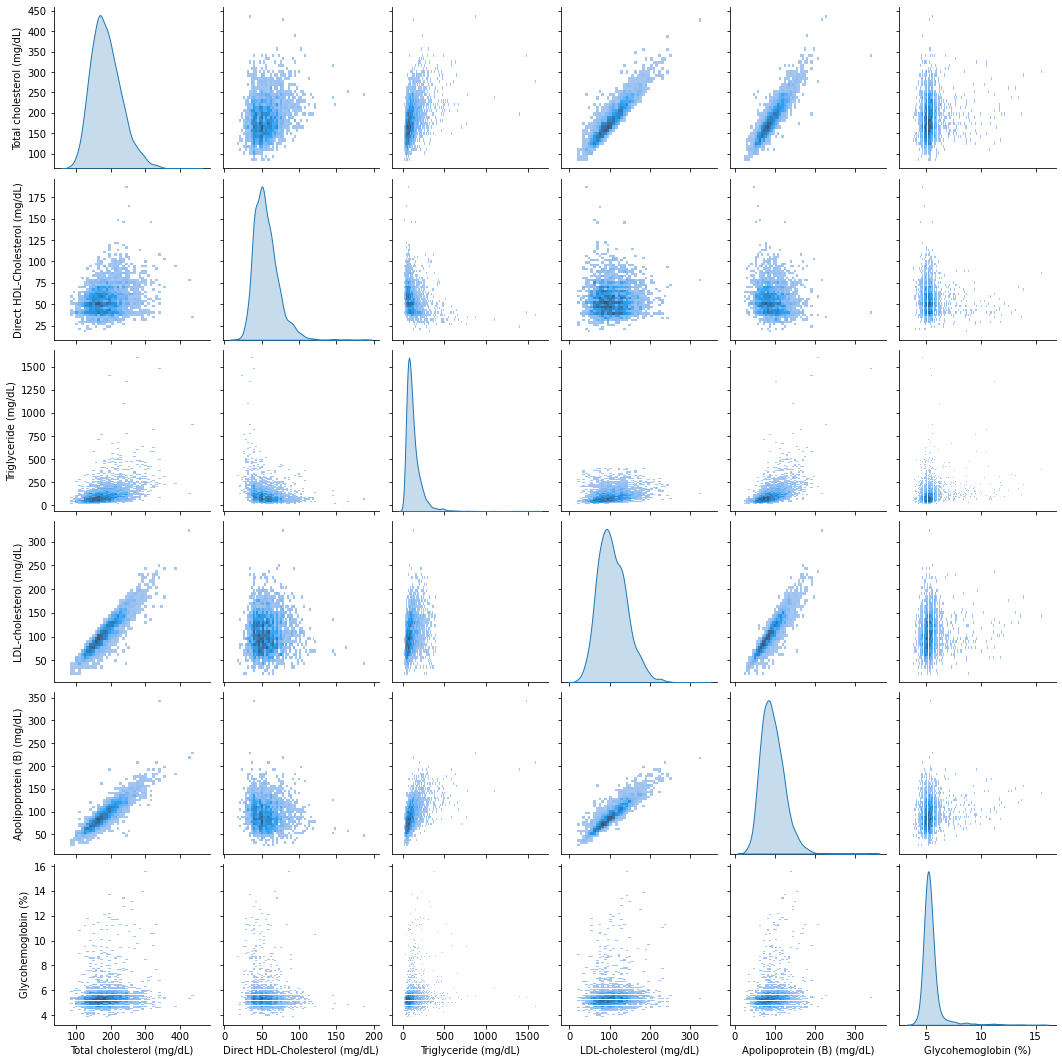

In [37]:
sns.pairplot(merge2[['Total cholesterol (mg/dL)',
       'Direct HDL-Cholesterol (mg/dL)', 'Triglyceride (mg/dL)',
       'LDL-cholesterol (mg/dL)', 'Apolipoprotein (B) (mg/dL)',
       'Glycohemoglobin (%)']], diag_kind='kde', kind='hist')